## Salary Hike

Objective  - Is to build a prediction model for Salary Hike.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

In [2]:
data=pd.read_csv('D:/TOPMENTOR-DS/Lectures/Class 20-29th-Oct/b88assignments/Project - 1&2_ Simple_Reg/Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
df=data.copy()
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
df.shape

(30, 2)

## Exploratory Data Analysis------  

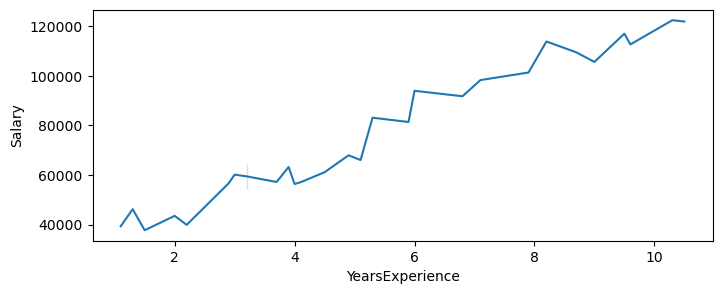

In [39]:
## Variation of hike in the Salary according to the experience of years
plt.figure(figsize=(8,3))
sns.lineplot(x='YearsExperience',y='Salary',data=df)
plt.savefig('Years of experience versus Salary hike.jpg')

Increase in the sorting time causes an increase in the delivery time, both are directly proportional

The skewness is : 0.35
count        30.000000
mean      76003.000000
std       27414.429785
min       37731.000000
25%       56720.750000
50%       65237.000000
75%      100544.750000
max      122391.000000
Name: Salary, dtype: float64


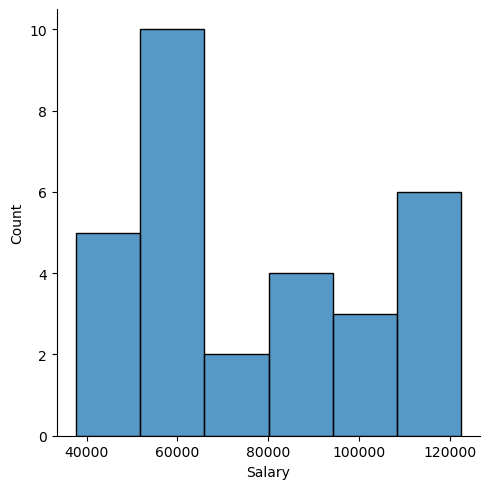

In [53]:
# Distribution of Salary hike data
sns.displot(df['Salary'])
print('The skewness is :', round(df['Salary'].skew(),2))
print(df['Salary'].describe())
plt.savefig('Distribution of Salary hike.jpg')

1. The distribution of salary is normally distributed
2. since skewness is between -1 and 1.
3. Also, there should no outliers present in the data.

The skewness is : 0.38
count    30.000000
mean      5.313333
std       2.837888
min       1.100000
25%       3.200000
50%       4.700000
75%       7.700000
max      10.500000
Name: YearsExperience, dtype: float64


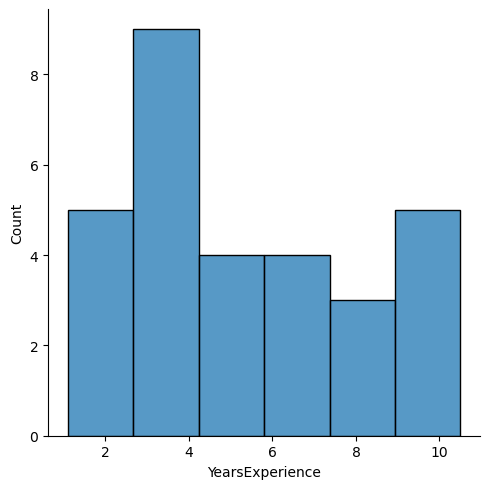

In [52]:
# Distribution of Years of experience data
sns.displot(df['YearsExperience'])
print('The skewness is :', round(df['YearsExperience'].skew(),2))
print(df['YearsExperience'].describe())
plt.savefig('Distribution of Years of experience.jpg')

1. The distribution of years of experience is normally distributed
2. since skewness is between -1 and 1.
3. Also, there should no outliers present in the data.

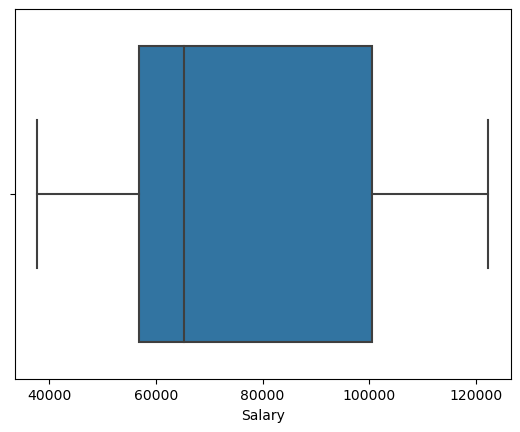

In [42]:
## Box plot of Salary hike data to check the presence of outliers
sns.boxplot(x=df['Salary'])
plt.savefig('Box plot of Salary hike.jpg')

1. There are no outliers in the Salary hike data.


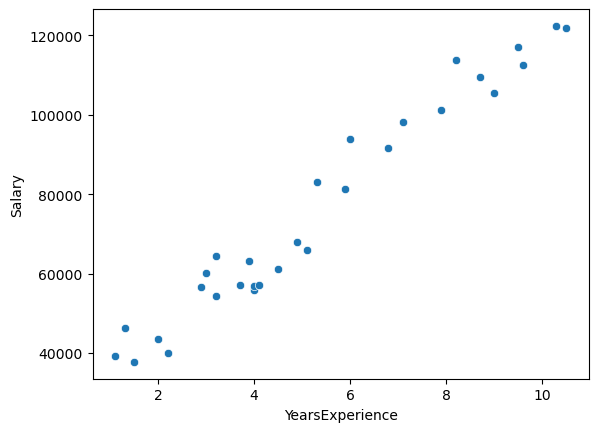

In [43]:
sns.scatterplot(x='YearsExperience',y='Salary',data=df)
plt.savefig('Scatter plot of Years of Experience versus Salary hike.jpg')

1. From the scatter plot it can be concluded that hike in Salary does depend on the years of experience.
2. More is the experience, larger is the salary hike.
3. But it also depend on other parameters, may be efficiency of the employee or other factors.


In [10]:
## the variance of data
v=df[['YearsExperience','Salary']].var()
print('The variance in the years of experience and Salary hike is:\n',round(v,2))

The variance in the years of experience and Salary hike is:
 YearsExperience    8.050000e+00
Salary             7.515510e+08
dtype: float64


1. The variance in the data is small that means it is slightly variated only.
2. The model can be predicted more accurately.  

In [11]:
model_data=df[['YearsExperience','Salary']]
print('The model data is given as:\n', model_data)

The model data is given as:
     YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0


In [58]:
## Correlation between Years of Experience and hike in Salary
c=round(model_data.corr(),2)
print('The correlation between Years of Experience and hike in Salary is :\n',c)

The correlation between Years of Experience and hike in Salary is :
                  YearsExperience  Salary
YearsExperience             1.00    0.98
Salary                      0.98    1.00


1. Both are approximately ~98% correlated, which means the data is highly correlated.
2. If correlated value is greater than 85% then it is a strong correlation. 

## Sampling the data-----

In [13]:
# the number of rows and columns in the given data
print('The number of rows and columns in the given data are:')
model_data.shape

The number of rows and columns in the given data are:


(30, 2)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x=model_data['YearsExperience']
y=model_data['Salary']

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

In [19]:
## The shape of data after distributing it into train and test category
x_train.shape,y_train.shape

((24,), (24,))

In [20]:
x_test.shape,y_test.shape

((6,), (6,))

In [21]:
# Reshaping of the data as it is a simple Linear Regression
x_train=x_train.values.reshape(-1,1)
y_train=y_train.values.reshape(-1,1)

## Model building-------

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
model=LinearRegression()
print(model)

LinearRegression()


In [24]:
model_fit=model.fit(x_train,y_train)

In [25]:
# Coefficient 
print('The coefficient of the fitted data is: ', model_fit.coef_)

The coefficient of the fitted data is:  [[9299.55411986]]


In [26]:
# Intercept of the fitting
print('The Intercept of the fitted data is: ',model_fit.intercept_)

The Intercept of the fitted data is:  [26356.32813508]


## Model Prediction

In [27]:
x_test=x_test.values.reshape(-1,1)

In [28]:
pred=model_fit.predict(x_test)
pred

array([[ 81223.69744227],
       [102612.67191795],
       [ 44955.4363748 ],
       [ 68204.32167446],
       [ 36585.83766693],
       [ 99822.80568199]])

In [29]:
df_pred=pd.DataFrame(pred,columns=['pred'])
df_pred

,pred
0,81223.697442
1,102612.671918
2,44955.436375
3,68204.321674
4,36585.837667
5,99822.805682


In [30]:
df_pred['Actual']=y_test.values
df_pred

,pred,Actual
0,81223.697442,81363.0
1,102612.671918,113812.0
2,44955.436375,43525.0
3,68204.321674,61111.0
4,36585.837667,39343.0
5,99822.805682,101302.0


## Error Calculation

In [31]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from math import sqrt

In [32]:
# R square value 
st=r2_score(df_pred['Actual'],df_pred['pred'])
print('The strength of the model is :',round(st,2))

The strength of the model is : 0.96


1. The strength of the model is strong since r square value lies between 0 and 1.
2. strongest when approaches 1 and weakest when approaches 0
So, the fitted model is fine.

In [48]:
# RMSE
RMSE= sqrt(mean_squared_error(df_pred['Actual'],df_pred['pred']))
print('The root mean square value of the model is :',round(RMSE,2))

The root mean square value of the model is : 5591.6


## Saving the model

In [36]:
import joblib

In [37]:
file_name='Salary_Prj2.sav'

In [38]:
joblib.dump(model_fit,file_name)

['Salary_Prj2.sav']